# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL

url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&q={city}&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&q={city}&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adrar
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vysokogornyy
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | mecca
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | kahului
Processing Record 13 of Set 1 | abu samrah
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | awjilah
Processing Record 18 of Set 1 | najran
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | bluff
Pr

Processing Record 37 of Set 4 | araras
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | port blair
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | zastron
Processing Record 43 of Set 4 | zhiletovo
Processing Record 44 of Set 4 | upata
Processing Record 45 of Set 4 | hailar
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | barcelos
Processing Record 48 of Set 4 | hays
Processing Record 49 of Set 4 | nieves
Processing Record 0 of Set 5 | the pas
Processing Record 1 of Set 5 | egvekinot
Processing Record 2 of Set 5 | uzhur-4
City not found. Skipping...
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | taoudenni
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | mitchelstown
Processing Record 8 of Set 5 | loukhi
Processing Record 9 of Set 5 | iqaluit
Processing Record 10 of Set 5

Processing Record 29 of Set 8 | santiago de cao
Processing Record 30 of Set 8 | college
Processing Record 31 of Set 8 | kalmunai
Processing Record 32 of Set 8 | sabla
Processing Record 33 of Set 8 | karamea
City not found. Skipping...
Processing Record 34 of Set 8 | macusani
Processing Record 35 of Set 8 | medicine hat
Processing Record 36 of Set 8 | bad aussee
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | bonfim
Processing Record 39 of Set 8 | balikpapan
Processing Record 40 of Set 8 | verkh-usugli
Processing Record 41 of Set 8 | auki
Processing Record 42 of Set 8 | elat
Processing Record 43 of Set 8 | nara
Processing Record 44 of Set 8 | tiksi
Processing Record 45 of Set 8 | vallenar
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of Set 8 | simao
Processing Record 49 of Set 8 | churapcha
Processing Record 0 of Set 9 | balabac
Processing Record 1 of Set 9 | mariental
Processing Record 2 of Set 9 | barawe
Ci

Processing Record 14 of Set 12 | merauke
Processing Record 15 of Set 12 | bambanglipuro
Processing Record 16 of Set 12 | montepuez
Processing Record 17 of Set 12 | dauphin
Processing Record 18 of Set 12 | kachug
Processing Record 19 of Set 12 | arlit
Processing Record 20 of Set 12 | chokwe
Processing Record 21 of Set 12 | arteaga
Processing Record 22 of Set 12 | atyrau
Processing Record 23 of Set 12 | kambove
Processing Record 24 of Set 12 | bethanien
Processing Record 25 of Set 12 | murray bridge
Processing Record 26 of Set 12 | angoche
Processing Record 27 of Set 12 | ypsonas
Processing Record 28 of Set 12 | chapais
Processing Record 29 of Set 12 | popondetta
Processing Record 30 of Set 12 | colares
Processing Record 31 of Set 12 | ahuimanu
Processing Record 32 of Set 12 | palana
Processing Record 33 of Set 12 | nome
Processing Record 34 of Set 12 | batagay-alyta
Processing Record 35 of Set 12 | snezhnogorsk
Processing Record 36 of Set 12 | maceio
Processing Record 37 of Set 12 | con

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adrar,20.5022,-10.0711,16.67,16,100,4.84,MR,1675546546
1,punta arenas,-53.1500,-70.9167,10.06,93,100,4.12,CL,1675546514
2,vysokogornyy,50.1167,139.1500,-27.44,100,99,0.70,RU,1675546740
3,mount gambier,-37.8333,140.7667,14.52,78,100,1.48,AU,1675546593
4,jamestown,42.0970,-79.2353,-3.03,32,0,6.17,US,1675546570


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adrar,20.5022,-10.0711,16.67,16,100,4.84,MR,1675546546
1,punta arenas,-53.1500,-70.9167,10.06,93,100,4.12,CL,1675546514
2,vysokogornyy,50.1167,139.1500,-27.44,100,99,0.70,RU,1675546740
3,mount gambier,-37.8333,140.7667,14.52,78,100,1.48,AU,1675546593
4,jamestown,42.0970,-79.2353,-3.03,32,0,6.17,US,1675546570


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


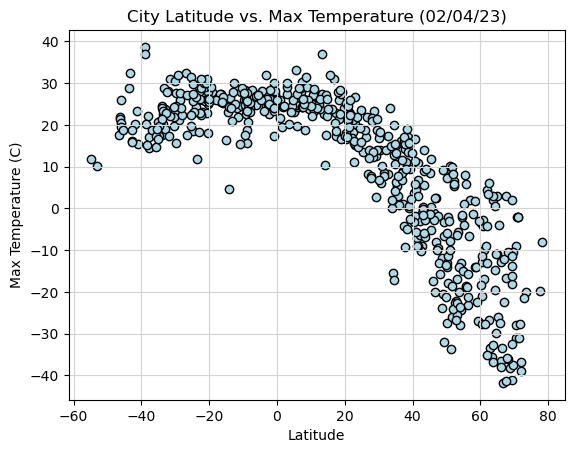

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


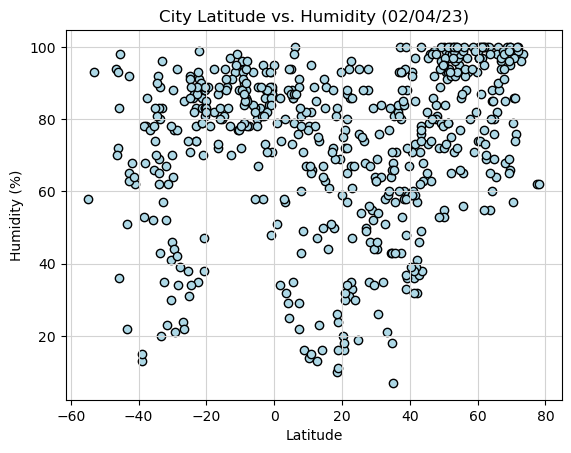

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


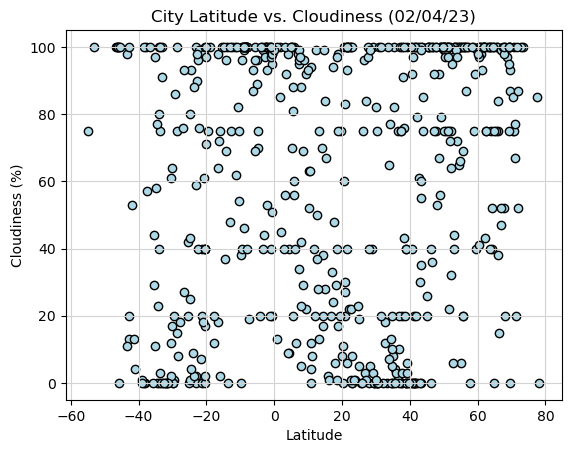

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


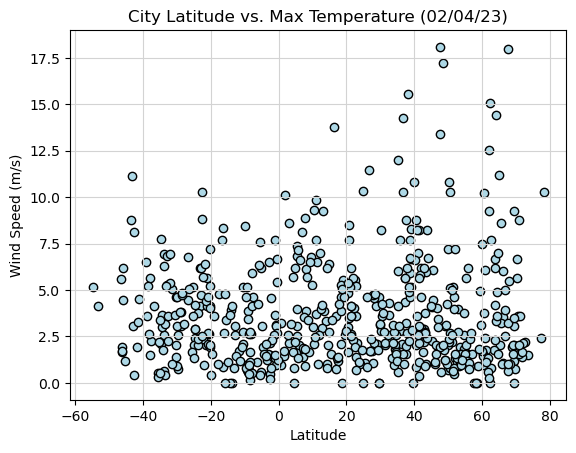

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots

def lin_reg(a, b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(a, b)
    regress_values = a * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(a, b, edgecolors="black", facecolors="lightblue")
    plt.plot(a, regress_values, "r-")
    print(f"The r-value is: {rvalue}")
    print(line_eq)




In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adrar,20.5022,-10.0711,16.67,16,100,4.84,MR,1675546546
2,vysokogornyy,50.1167,139.1500,-27.44,100,99,0.70,RU,1675546740
4,jamestown,42.0970,-79.2353,-3.03,32,0,6.17,US,1675546570
5,qaanaaq,77.4840,-69.3632,-19.66,62,85,2.42,GL,1675546677
7,mecca,21.4267,39.8261,20.07,57,6,2.63,SA,1675546675


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,10.06,93,100,4.12,CL,1675546514
3,mount gambier,-37.8333,140.7667,14.52,78,100,1.48,AU,1675546593
6,castro,-24.7911,-50.0119,18.60,92,80,2.43,BR,1675546741
9,ushuaia,-54.8000,-68.3000,11.81,58,75,5.14,AR,1675546564
10,mataura,-46.1927,168.8643,21.93,72,100,1.67,NZ,1675546572


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8555583517263501
y = -0.8x + 34.58


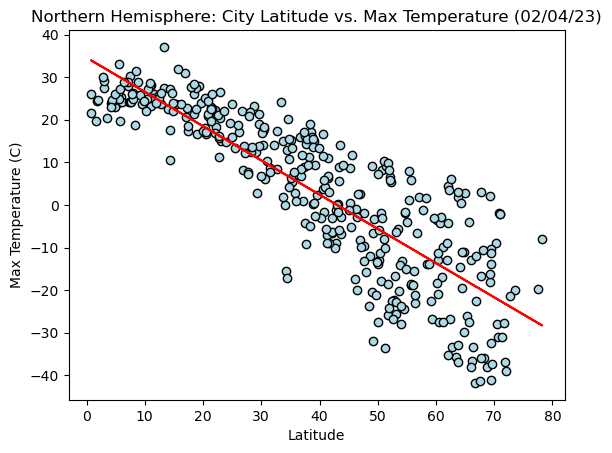

In [101]:
# Linear regression on Northern Hemisphere
    
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()


The r-value is: 0.3253192940436545
y = 0.12x + 26.48


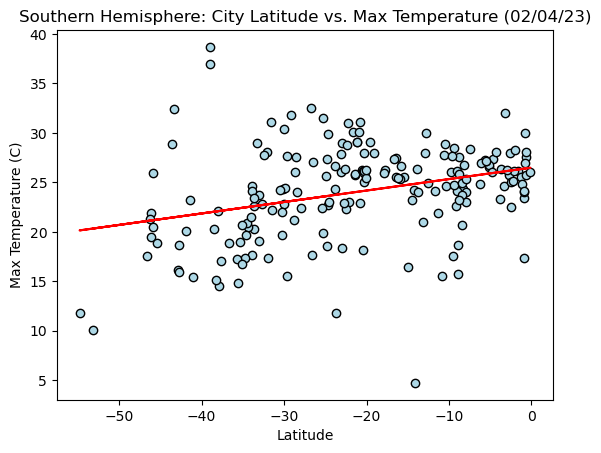

In [102]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a high negative correlation, meaning that as you move farther from the equator, temperature decreases. The southen hemisphere does not have as strong of a correlation, however there is still a positive relationship that we observe.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4163881729169791
y = 0.48x + 53.82


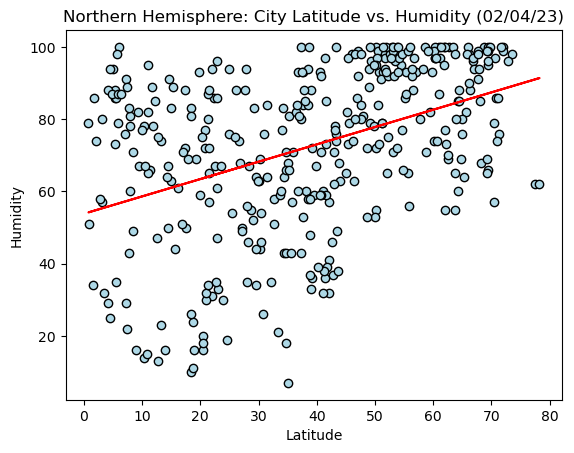

In [110]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.title("Northern Hemisphere: City Latitude vs. Humidity (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


The r-value is: 0.3845363235566182
y = 0.56x + 86.98


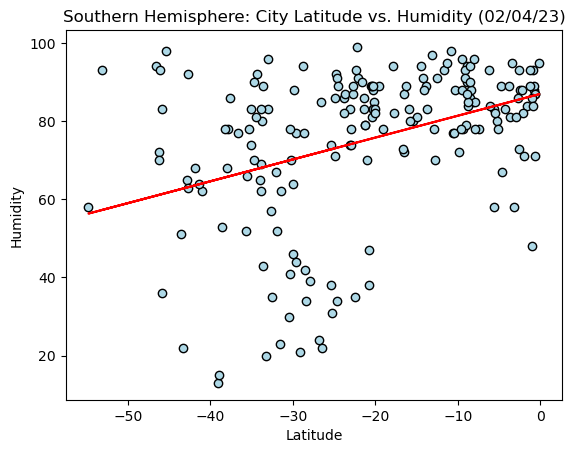

In [104]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.title("Southern Hemisphere: City Latitude vs. Humidity (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** For both the north and south hemispheres, there are not strong correlations between humidity and latitude. However, both have positive relationships, meaning that the more north the city is (per hemisphere), the mire humidity there is.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2825492433729076
y = 0.55x + 38.32


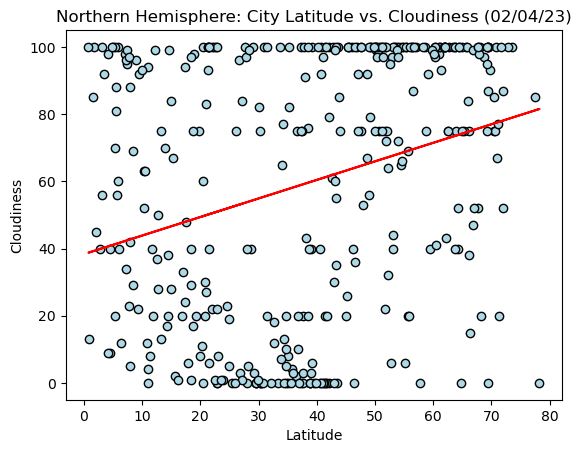

In [106]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()


The r-value is: 0.31601756566906486
y = 0.93x + 78.93


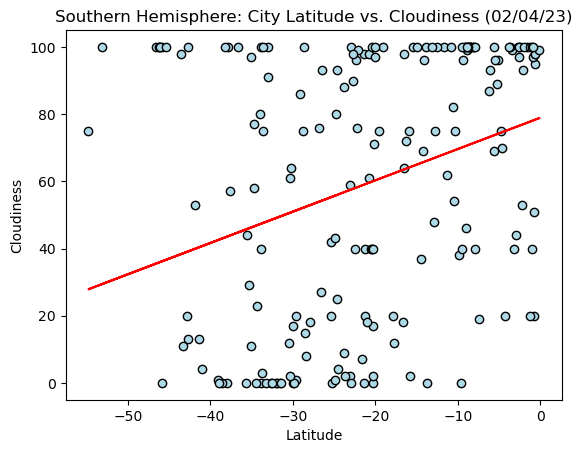

In [107]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Correlation values for both north and south hemisphere are relatively low. Both observe a positive linear relationship, however there are many outliers that do not fit within this relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.030311519600608614
y = -0.0x + 3.99


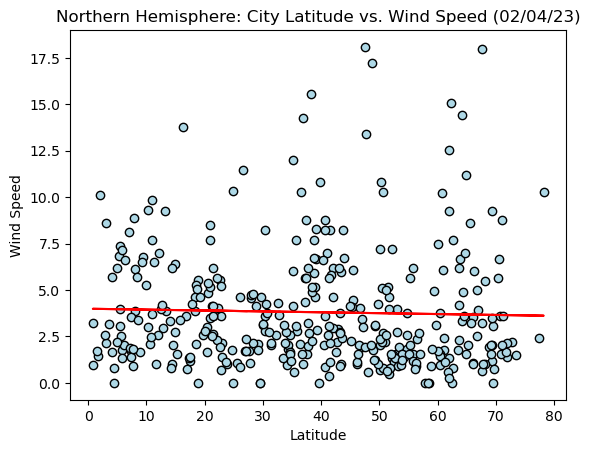

In [108]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()


The r-value is: -0.2046861515294068
y = -0.03x + 2.6


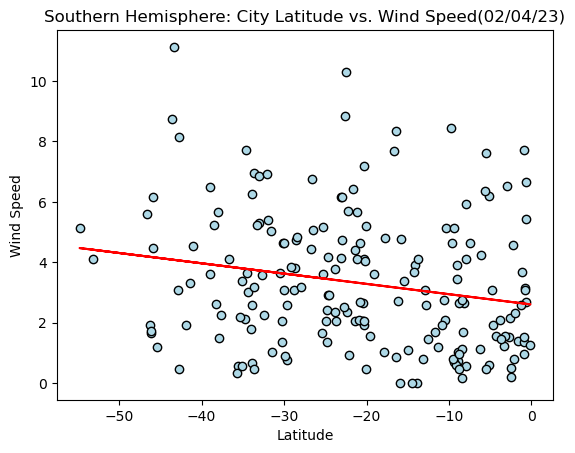

In [109]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed(02/04/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Both north and south hemispheres have low correlations. While both linear relationships are negative, there are still many outliers that do not follow this pattern. 